#**Human Face Detection and Recognition from Images**

# Face Detection 

###MTCNN : 
MTCNN is a face detector for Keras in Python3.4+. It is written from scratch, using as a reference the implementation of MTCNN from David Sandberg (FaceNet's MTCNN) in Facenet. It is based on the paper Zhang, K et al. (2016) [ZHANG2016].

In [ ]:
!pip install mtcnn
!pip install keras_vggface

In [ ]:
from matplotlib import pyplot as plt

# Multi Task Convolutional Neural Network
from mtcnn.mtcnn import MTCNN 

Using TensorFlow backend.


In [ ]:
from matplotlib.patches import Rectangle

In [ ]:
from numpy import asarray
from PIL import Image 


### Face Detection -- Custom Function that utilized MTCNN for Extracting Facial Regions from a given image

In [ ]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # Load image and detect faces
    image = plt.imread(image_path)

    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

In [ ]:
image_path='./greta-thunberg-un-speech.jpg'

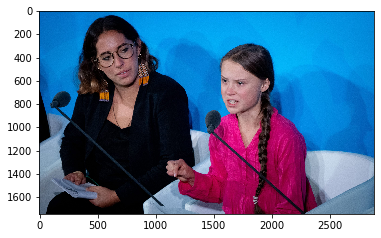

In [ ]:
image = plt.imread(image_path)
plt.imshow(image)

In [ ]:
extracted_face = extract_face_from_image(image_path)

In [ ]:
# Display the first face from the extracted faces
print(len(extracted_face))

4


In [ ]:
extracted_face

[array([[[  0, 119, 185],
         [  1, 109, 173],
         [ 10, 110, 172],
         ...,
         [ 28,  23,  30],
         [ 27,  22,  29],
         [ 14,   9,  16]],
 
        [[  2, 114, 180],
         [ 18, 116, 181],
         [ 24, 109, 173],
         ...,
         [ 18,  13,  20],
         [ 24,  19,  26],
         [ 25,  20,  27]],
 
        [[  4, 117, 195],
         [  5, 119, 189],
         [ 11, 127, 188],
         ...,
         [ 30,  25,  31],
         [ 26,  21,  27],
         [ 25,  20,  26]],
 
        ...,
 
        [[  2, 155, 235],
         [  4, 153, 235],
         [  4, 149, 232],
         ...,
         [152, 109, 102],
         [147, 104,  97],
         [144, 103,  97]],
 
        [[  0, 152, 231],
         [  2, 151, 235],
         [  5, 149, 235],
         ...,
         [157, 114, 107],
         [148, 105,  98],
         [135,  94,  88]],
 
        [[  0, 155, 229],
         [  0, 150, 230],
         [  1, 150, 234],
         ...,
         [154, 111, 104],
  

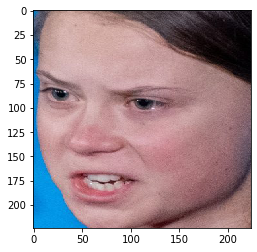

In [ ]:
# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

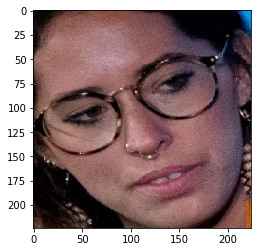

In [ ]:
# Display the first face from the extracted faces
plt.imshow(extracted_face[1])
plt.show()

## False Detections!!!!!

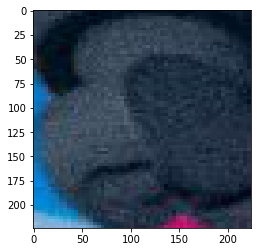

In [ ]:
# Display the first face from the extracted faces
plt.imshow(extracted_face[2])
plt.show()

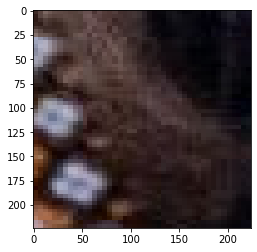

In [ ]:
# Display the first face from the extracted faces
plt.imshow(extracted_face[3])
plt.show()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++

# Face Recognition with VGG-Face

###vgg_face :
Oxford VGGFace Implementation using Keras Functional Framework v2+



### Read faces from a dataset.

### Find Face Embeddings

In [ ]:
# you can use data base from here : http://vision.ucsd.edu/content/yale-face-database 
# popularly known as yale faces
# tons of interesting datasets here : http://homepages.inf.ed.ac.uk/rbf/CVonline/Imagedbase.htm#face

In [ ]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [ ]:
import os

In [ ]:
# Create a subfoler with name "train" and upload some images inside this folder
faces_path ='./train/'

In [ ]:
files = os.listdir(faces_path)

In [ ]:
files

['modi_rahul.jpg',
 'yadavs.jpg',
 'YS-Jagan-Mohan-Reddy.jpg',
 'yedyurappa.jpg',
 'arvind-kejriwal-sushma-swaraj.jpg',
 'jaya.jpg',
 'smriti_irani.jpeg']

In [ ]:
#files=[x for x in files if x[0]!='.'] # to remove system files 

In [ ]:
stored_faces=[]

## Face Detection with MTCNN

In [ ]:
# Here we use MTCNN for extracting the facial regions from images
# Face detection
for file in files:
    extracted_face = extract_face_from_image(faces_path+file)
    for face in extracted_face:
        stored_faces.append(face)

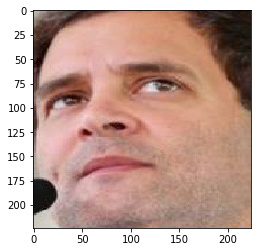

In [ ]:
plt.imshow(stored_faces[0])
plt.show()

In [ ]:
#names = ['smriti irani','BS yediyurappa','jaganmohan reddy','arvind kejriwal','sushma swaraj','rahul gandhi','narendra modi', 'akhilesh yadav','dimple yadav','jayalalitha']

names = ['rahul gandhi','narendra modi', 'akhilesh yadav','dimple yadav', 'jaganmohan reddy','BS yediyurappa','arvind kejriwal','sushma swaraj','jayalalitha','smriti irani']

## Extract Face Embeddings from Images

In [ ]:
# Get Facial Embeddings from the image
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

    # perform prediction
    return model.predict(samples)


### Extract Face Embeddings

In [ ]:
# Find face embeddings
stored_faces_embeddings = get_model_scores(stored_faces)

In [ ]:
stored_faces_embeddings.shape

(10, 2048)

## Register Facial Embeddings with the Known Labels/Person-names

In [ ]:
stored_faces_embeddings_dict = dict(zip(names, stored_faces_embeddings))

In [ ]:
stored_faces_embeddings_dict.items()

dict_items([('rahul gandhi', array([0.10431494, 4.7696323 , 0.6873438 , ..., 0.28857684, 0.20281479,
       0.        ], dtype=float32)), ('narendra modi', array([0.00445875, 0.        , 1.7414633 , ..., 0.        , 0.        ,
       0.03225465], dtype=float32)), ('akhilesh yadav', array([0.        , 1.1204767 , 1.1929111 , ..., 2.0280652 , 0.01605879,
       7.592895  ], dtype=float32)), ('dimple yadav', array([0.        , 0.7830762 , 3.7737772 , ..., 0.        , 0.        ,
       0.02803087], dtype=float32)), ('jaganmohan reddy', array([0.0000000e+00, 8.4989347e+00, 1.6929804e+00, ..., 6.4356914e+00,
       2.1170158e-02, 6.9105672e-03], dtype=float32)), ('BS yediyurappa', array([0.76363194, 0.        , 8.083145  , ..., 0.        , 6.32879   ,
       0.        ], dtype=float32)), ('arvind kejriwal', array([1.0725361, 0.       , 0.5128721, ..., 2.6303182, 0.       ,
       0.       ], dtype=float32)), ('sushma swaraj', array([4.1272804e-02, 5.3446757e-04, 0.0000000e+00, ..., 3.50342

### Write a Custom Function for Matching Faces

In [ ]:
# Find facial match
def get_match(face_score):
    
    no_match=True
    
    for i, j in stored_faces_embeddings_dict.items():
        if cosine(face_score, j)<0.4:    # Cosine similarity - less distance means more match
            print(i)
            no_match=False
    if no_match:
        print('No Match')
    

## Test the Face Detection Model on some Test Images

In [ ]:
## Create a folder test and upload some test images

In [ ]:
test_file = r'./test/test_pol1.jpg'

In [ ]:
image = plt.imread(test_file)

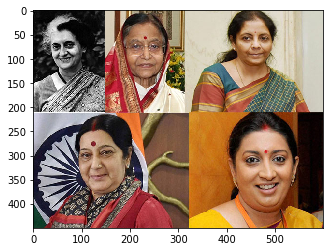

In [ ]:
plt.imshow(image)

### Extract Facial Regions from the Test Images

In [ ]:
# Face detection from the image
faces_in_image = extract_face_from_image(test_file)

In [ ]:
# Get Facial Embeddings from the image
face_scores = get_model_scores(faces_in_image)

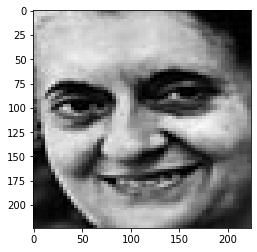

In [ ]:
plt.imshow(faces_in_image[1])
plt.show()

In [ ]:
# Find facial match
get_match(face_scores[1])

No Match


In [ ]:
test_file = r'./test/test_pol2.jpg'

In [ ]:
image = plt.imread(test_file)

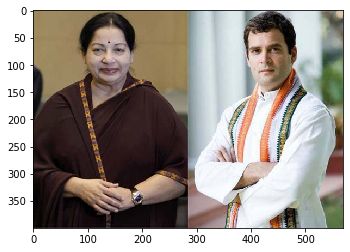

In [ ]:
plt.imshow(image)

In [ ]:
# Face detection from the image
faces_in_image = extract_face_from_image(test_file)

In [ ]:
# Get Facial Embeddings from the image
face_scores = get_model_scores(faces_in_image)

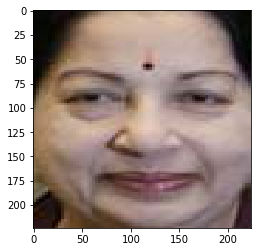

In [ ]:
plt.imshow(faces_in_image[0])
plt.show()

In [ ]:
# Find facial match
get_match(face_scores[0])

jayalalitha


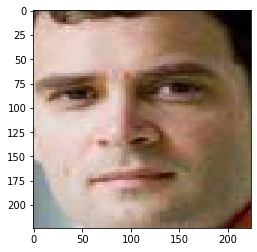

In [ ]:
plt.imshow(faces_in_image[1])
plt.show()

In [ ]:
# Find facial match
get_match(face_scores[1])

rahul gandhi
